# Manually Serve the model 

In notebook '04-04-accident-recognition' we were able to use the retrained model to predict a 'severe' or 'moderate' car accident within an image.  

Now we will determine if we can query the model direclt from the model server we have created.  This will be done through an API call.

**Important**: First, enter the inference endpoint URL you got after deploying the model server.

In [1]:
# Normally, this should be
# RestURL = 'http://modelmesh-serving.userX:8008' , with userX being replaced by the user you have been assigned.
RestURL = 'http://modelmesh-serving.user1:8008'

In [ ]:
# If you did not use the Workbench image designed for this Lab, you can uncomment and run the following line to install the required packages.
#!pip install --no-cache-dir --no-dependencies -r requirements.txt

In [2]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

from remote_infer_rest import do_inference

## We will define the inference URL, the model name, the YAML file with your classes

In [3]:
infer_url = f'{RestURL}/v2/models/my-first-model/infer'

model_name =  'my-first-model'

classes_file = 'classes.yaml'

## Now we set the parameters for the inference

In [4]:
# 1. The image you want to analyze
image_path ='images/carImage3.jpg' # You can replace this with an image you upload

# 2. Confidence threshold, between 0 and 1 (detections with less score won't be retained)
conf = 0.95

# 3. Intersection over Union Threshold, between 0 and 1 (cleanup overlapping boxes)
iou = 0.6

## Launch the inference and show the result

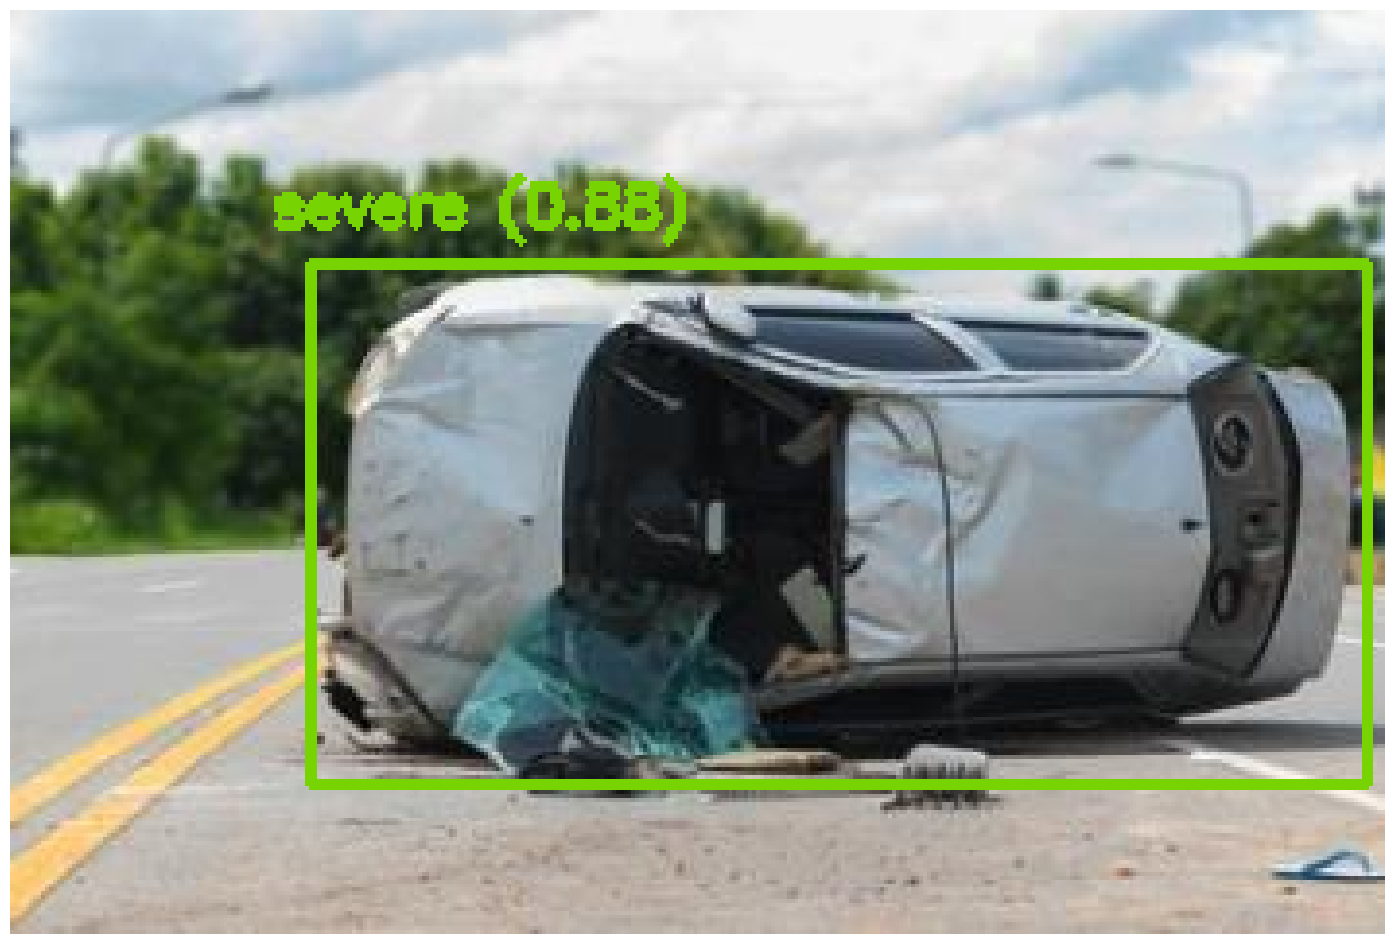

In [5]:
onnx_model = 'accident_detect.onnx'
results = do_inference(onnx_model, image_path, infer_url, classes_file)

In [21]:
print(results[0])

{'class_id': 1, 'class_name': 'severe', 'confidence': 0.8825919032096863, 'box': [138.58258056640625, 116.9075927734375, 492.54926, 242.00726], 'scale': 0.553125}


In [27]:
# Extract all the information from the result (type, bounding box, probability)

result = results[0]
class_id = result['class_name']
cords = result['box']
cords = [round(x) for x in cords]
conf =  result['confidence']
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print("---")

Object type: severe
Coordinates: [139, 117, 493, 242]
Probability: 0.8825919032096863
---


images/carImage1.jpg processed in 2.78 seconds, inference time 2.68 seconds
Predictions:
tensor([[1.7016e+02, 7.0016e+01, 5.1317e+02, 6.1585e+02, 4.0901e+05, 0.0000e+00],
        [2.1982e+02, 2.2703e+02, 8.0313e+02, 8.5026e+02, 3.9875e+05, 0.0000e+00],
        [3.1553e+02, 3.1553e+02, 9.4662e+02, 9.4664e+02, 3.9831e+05, 0.0000e+00],
        ...,
        [7.5299e+01, 1.5724e+02, 1.4729e+02, 2.0306e+02, 1.1029e+03, 0.0000e+00],
        [1.4254e+02, 3.0080e+01, 1.8269e+02, 7.1751e+01, 1.0960e+03, 0.0000e+00],
        [6.2326e+02, 6.2240e+02, 6.2943e+02, 6.3628e+02, 1.0860e+03, 1.0000e+00]],
       dtype=torch.float64)
Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]
The coordinates are relative to a letterboxed representation of the image of size 640x640


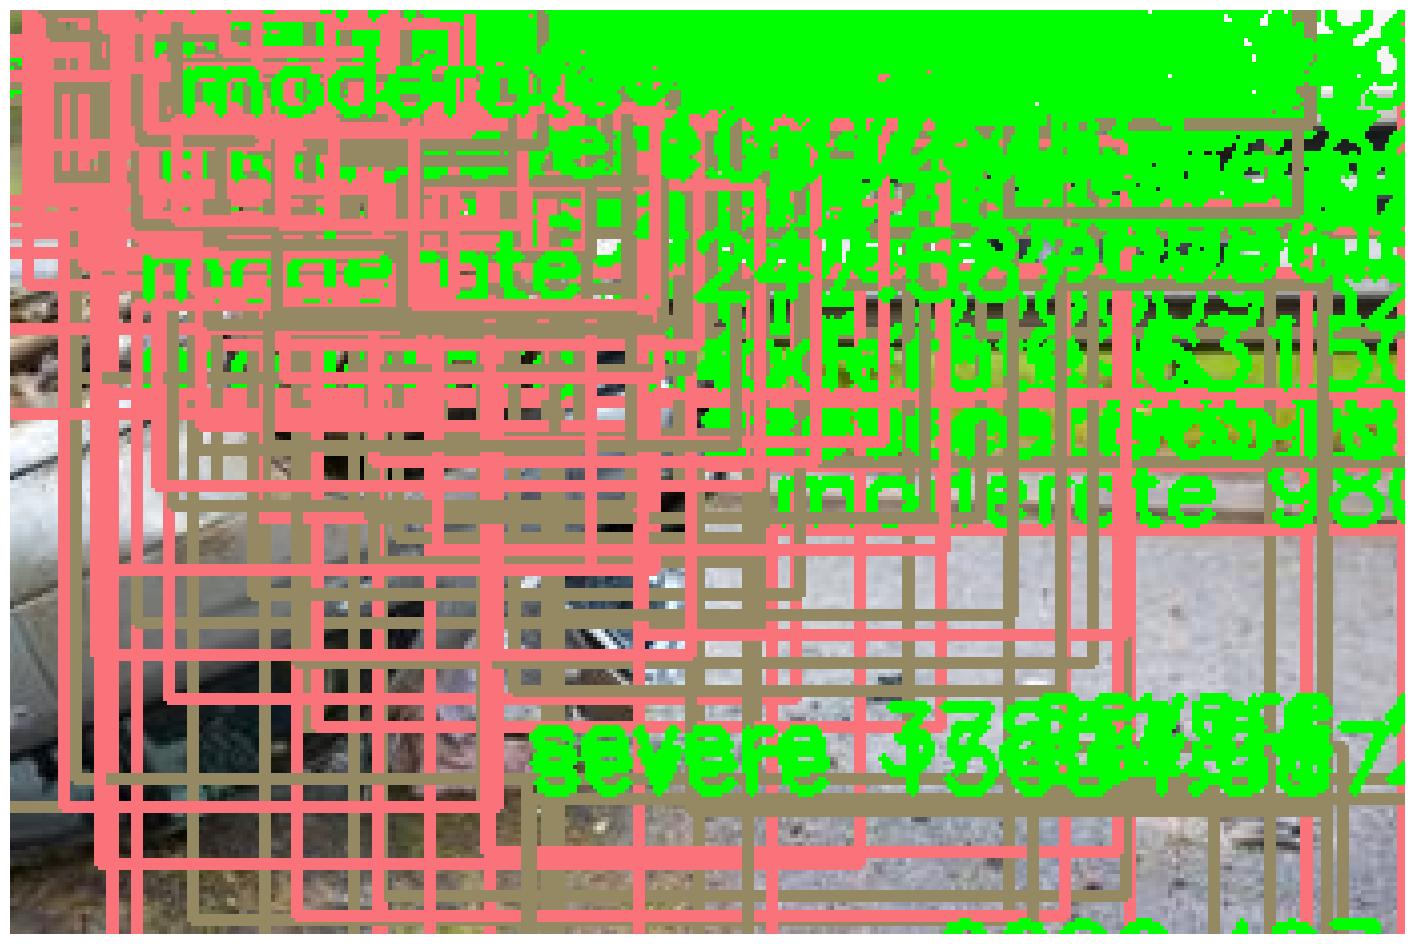

In [14]:
#yolo5 model inference from Guillaume
#onnx_model = 'accident_detect.onnx'
#infer = do_inference(onnx_model, image_path, infer_url, conf, iou, 640, classes_file)
#img, out, result = infer()
print(f'{result}')
print('Predictions:')
print(out)
print('Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]')
print('The coordinates are relative to a letterboxed representation of the image of size 640x640')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.gcf()
fig.set_size_inches(24, 12)
plt.axis('off')
plt.imshow(img);